1. if the data is correct, in enron, people use other people's account to send emails
2. the network is by columns 'from' & 'to'
3. personal emials are commonly used in business
4. form two networks one is purely enron server emails, the other realtes with personal mails 
5. some assumptions:
    - poeple have fewer emails are less important,  so we ignore them
    - we only look at emails with '@enron.com' , one people only have one emails address like this
    

In [1]:
import re
import warnings
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')


In [212]:
df = pd.read_csv('/Users/yangyang/Desktop/DS/raw_data/emails2.csv')

In [213]:
df[['From','To']]

,From,To
0,frozenset({'phillip.allen@enron.com'}),frozenset({'tim.belden@enron.com'})
1,frozenset({'phillip.allen@enron.com'}),frozenset({'john.lavorato@enron.com'})
2,frozenset({'phillip.allen@enron.com'}),frozenset({'leah.arsdall@enron.com'})
3,frozenset({'phillip.allen@enron.com'}),frozenset({'randall.gay@enron.com'})
4,frozenset({'phillip.allen@enron.com'}),frozenset({'greg.piper@enron.com'})
5,frozenset({'phillip.allen@enron.com'}),frozenset({'greg.piper@enron.com'})
6,frozenset({'phillip.allen@enron.com'}),"frozenset({'david.l.johnson@enron.com', 'john...."
7,frozenset({'phillip.allen@enron.com'}),frozenset({'joyce.teixeira@enron.com'})
8,frozenset({'phillip.allen@enron.com'}),frozenset({'mark.scott@enron.com'})
9,frozenset({'phillip.allen@enron.com'}),frozenset({'zimam@enron.com'})


In [4]:
df['X-From'].unique()

array(['Phillip K Allen', 'Ina Rangel',
       'Multex Investor <1.11913372.-2@multexinvestornetwork.com>', ...,
       '"Edward Chan" <edwardc38@hotmail.com>@ENRON',
       '"carol.moline@powerpool.ab.ca" <carol.moline@powerpool.ab.ca>@ENRON',
       'Erik Cramer <ingjald@shaw.ca>@ENRON'], dtype=object)

In [5]:
df['user'].unique()

array(['allen-p', 'arnold-j', 'arora-h', 'badeer-r', 'bailey-s', 'bass-e',
       'baughman-d', 'beck-s', 'benson-r', 'blair-l', 'brawner-s', 'buy-r',
       'campbell-l', 'carson-m', 'cash-m', 'causholli-m', 'corman-s',
       'crandell-s', 'cuilla-m', 'dasovich-j', 'davis-d', 'dean-c',
       'delainey-d', 'derrick-j', 'dickson-s', 'donoho-l', 'donohoe-t',
       'dorland-c', 'ermis-f', 'farmer-d', 'fischer-m', 'forney-j',
       'fossum-d', 'gang-l', 'gay-r', 'geaccone-t', 'germany-c',
       'gilbertsmith-d', 'giron-d', 'griffith-j', 'grigsby-m', 'guzman-m',
       'haedicke-m', 'hain-m', 'harris-s', 'hayslett-r', 'heard-m',
       'hendrickson-s', 'hernandez-j', 'hodge-j', 'holst-k', 'horton-s',
       'hyatt-k', 'hyvl-d', 'jones-t', 'kaminski-v', 'kean-s', 'keavey-p',
       'keiser-k', 'king-j', 'kitchen-l', 'kuykendall-t', 'lavorato-j',
       'lay-k', 'lenhart-m', 'lewis-a', 'linder-e', 'lokay-m', 'lokey-t',
       'love-p', 'lucci-p', 'maggi-m', 'mann-k', 'martin-t', 'may-l',

In [6]:
df['folder_cut'] = df['file'].apply(lambda x : x.split('/')[1])

In [7]:
df['folder_cut'].unique()

array(['_sent_mail', 'all_documents', 'contacts', ..., 'tq', 'tradecounts',
       'tss'], dtype=object)

In [8]:
len(df['user'].unique())

150

In [9]:
df = df[['From','To']]
df1 = df.copy()

In [10]:
def replace_all(eg):
    rep = {"(":"",
       ")":"",
      "{":"",
      "}":"",
      "'":"",
        '"':"",
      "frozenset":""}
    for i,j in rep.items():
        eg = eg.replace(i,j)
    return eg

In [11]:
df1['From'] = df1['From'].apply(lambda x : replace_all(str(x)))
df1['To'] = df1['To'].apply(lambda x : replace_all(str(x)))

In [12]:
# df1 is clean from&to  email address 
df1.tail(50)

,From,To
517351,john.zufferli@enron.com,"chad.clark@enron.com, chris.lambie@enron.com, ..."
517352,john.zufferli@enron.com,kathy.reeves@enron.com
517353,john.zufferli@enron.com,david_paul_smith@attbi.com
517354,john.zufferli@enron.com,garrett.tripp@enron.com
517355,john.zufferli@enron.com,rob.milnthorp@enron.com
517356,john.zufferli@enron.com,john.postlethwaite@enron.com
517357,john.zufferli@enron.com,chris.dorland@enron.com
517358,john.zufferli@enron.com,john.postlethwaite@enron.com
517359,john.zufferli@enron.com,greg.woulfe@enron.com
517360,john.zufferli@enron.com,livia_zufferli@monitor.com


In [13]:
# concat series 
cct = pd.concat([pd.Series(row['From'],row['To'].split(',')) for _,row in df1.iterrows()])

In [14]:
adj_mat1 = cct.reset_index()

In [15]:
# adjencency matrix, however some values are still emails,
adj_mat1.columns = ['To','From']
adj_mat1['tag'] = [i for i in range(3123028)]
adj_mat1.tail(5)

,To,From,tag
3123023,kori.loibl@enron.com,john.zufferli@enron.com,3123023
3123024,john.lavorato@enron.com,john.zufferli@enron.com,3123024
3123025,dawn.doucet@enron.com,john.zufferli@enron.com,3123025
3123026,jeanie.slone@enron.com,john.zufferli@enron.com,3123026
3123027,livia_zufferli@monitor.com,john.zufferli@enron.com,3123027


In [16]:
# mt3 is pure enron
is_To_enron = [bool('@enron.com' in i) for i in adj_mat1['To']]
print(sum(is_To_enron))
adj_mat2 = adj_mat1[is_To_enron].copy()
is_From_enron = [bool('@enron.com' in i) for i in adj_mat2['From']]
print(sum(is_From_enron))
adj_mat3 = adj_mat2[is_From_enron].copy()

2642650
2490697


In [17]:
#test if pure enron ---yes!
print(adj_mat3.shape)
sum(['enron' in x for x in adj_mat3['From']])

(2490697, 3)


2490697

In [18]:
# mat4 is links which relate with personal emails
adj_mat1.set_index('tag')
adj_mat3.set_index('tag')
adj_mat4 = adj_mat1.drop(adj_mat3['tag'],axis=0).copy()

In [19]:
adj_mat4 = adj_mat4.drop('tag',axis=1)

In [20]:
# get naive adj matrix
adj_mat3['From'] = adj_mat3['From'].apply(lambda x: re.sub(r'@.*','',x))
adj_mat3['To'] = adj_mat3['To'].apply(lambda x: re.sub(r'@.*','',x))

In [21]:
adj_mat = adj_mat3.drop('tag',axis=1).copy()

In [22]:
adj_mat.shape

(2490697, 2)

In [57]:
# DELETE emails address that is not a person's name 
adj_mat_cleaned_to = adj_mat[[bool(re.match(r'^[a-zA-Z]',x) and
                                (not re.match(r'.*\.\..*',x)) and
                               (not re.match(r'^all\..+',x)) and
                               re.match(r'.+\..+',x)) for x in adj_mat['To']]].copy()
adj_mat_cleaned_all = adj_mat_cleaned_to[[bool(re.match(r'^[a-zA-Z]',x) and
                                (not re.match(r'.*\.\..*',x)) and
                               (not re.match(r'^all\..+',x)) and
                               re.match(r'.+\..+',x)) for x in adj_mat_cleaned_to['From']]].copy()

In [58]:
grouped_mat = adj_mat_cleaned_all.groupby(['From','To']).size().reset_index().copy()
# grouped_mat.to_csv('adj_mat.csv')

In [59]:
# have a look at unique values in from/to columns------- too many!
len(sorted(list(set(grouped_mat['To'].values)),reverse=True))

6657

In [60]:
sorted(list(set(grouped_mat['From'].values)))

['a.nichols',
 'a.taylor',
 'aamir.maniar',
 'aaron.armstrong',
 'aaron.berutti',
 'aaron.brown',
 'aaron.klemm',
 'aaron.martinsen',
 'abhijeet.naik',
 'adam.bayer',
 'adam.giannone',
 'adam.johnson',
 'adam.overfield',
 'adam.pollock',
 'adam.siegel',
 'adam.umanoff',
 'adarsh.vakharia',
 'adel.robinson',
 'admin.enron',
 'administration.enron',
 'adnan.patel',
 'adrial.boals',
 'adrian.mancebo',
 'adrian.woolcock',
 'adriana.wynn',
 'adriane.moratto',
 'adriane.schultea',
 'adrianne.engler',
 'aftab.saleem',
 'agatha.tran',
 'agent.manager',
 'agustin.perez',
 'aimee.lannou',
 'airam.arteaga',
 'akasha.redrick',
 'al.alexanderson',
 'alaadin.suliman',
 'alain.diza',
 'alan.aronowitz',
 'alan.chapman',
 'alan.chen',
 'alan.comnes',
 'alan.engberg',
 'alan.jones',
 'alan.larsen',
 'alan.quaintance',
 'albane.perinne',
 'albernita.travis',
 'albert.escamilla',
 'albert.luc',
 'albert.meyers',
 'alberto.gude',
 'alberto.levy',
 'aleck.dadson',
 'alejandra.chavez',
 'alejandro.hernandez'

In [62]:
# edge count bigger than n
n = 100
grouped_mat.columns = ['From','To','Count']
gm_count_btn = grouped_mat[grouped_mat['Count'] > n].copy()
gm_count_btn

,From,To,Count
113,aimee.lannou,daren.farmer,207
303,aleck.dadson,richard.shapiro,121
495,amanda.rybarski,mike.maggi,137
523,ami.chokshi,daren.farmer,110
526,ami.chokshi,george.grant,153
531,ami.chokshi,mark.schrab,129
641,amy.fitzpatrick,portland.desk,230
1198,ann.schmidt,karen.denne,156
1429,audrey.robertson,audrey.robertson,247
1808,ben.jacoby,kay.mann,263


In [ ]:
grouped_mat.to_csv('grouped_matrix.csv')

- start to viz!!

In [117]:
weights = np.array([n['Count'] for (a,b,n) in g.edges(data=True)])
max = np.max(weights); min = np.min(weights)
weights_scaled = (weights-min)/(max-min)

In [186]:
nx.spring_layout(g)

{'aimee.lannou': array([ 0.09238319,  0.781604  ]),
 'airam.arteaga': array([ 0.60160904,  0.01270358]),
 'aleck.dadson': array([ 0.95903578,  0.69984055]),
 'alexandra.saler': array([ 0.78665844,  0.09574141]),
 'amanda.huble': array([ 0.68433506,  0.03601823]),
 'amanda.rybarski': array([ 0.72916821,  0.06175307]),
 'ami.chokshi': array([ 0.1739315 ,  0.87764138]),
 'amy.fitzpatrick': array([ 0.44432947,  0.00390362]),
 'andres.balmaceda': array([ 0.98683231,  0.38825303]),
 'andrew.edison': array([ 0.00524343,  0.5801594 ]),
 'anita.dupont': array([ 0.03289791,  0.6658516 ]),
 'anita.patton': array([ 0.29122076,  0.05348364]),
 'ann.schmidt': array([ 0.9727751 ,  0.43284789]),
 'anne.bike': array([ 0.09049196,  0.28997073]),
 'audrey.robertson': array([ 0.97318841,  0.34033193]),
 'ava.garcia': array([ 0.04998319,  0.29927105]),
 'becky.pitre': array([ 0.0648824,  0.2596125]),
 'ben.jacoby': array([ 0.42300635,  0.99265941]),
 'benjamin.rogers': array([ 0.58874186,  0.99147243]),
 '

In [207]:
# create a dict of labels that i want to plot
selected_dict = {}
values = sorted([ v for v in nx.degree(g).values()])
for key,value in nx.degree(g).items():
    if value > values[-10]:
        selected_dict[key] = key
selected_dict

{'chris.germany': 'chris.germany',
 'eric.bass': 'eric.bass',
 'jeff.dasovich': 'jeff.dasovich',
 'kay.mann': 'kay.mann',
 'sara.shackleton': 'sara.shackleton',
 'steven.kean': 'steven.kean',
 'tana.jones': 'tana.jones',
 'vince.kaminski': 'vince.kaminski'}

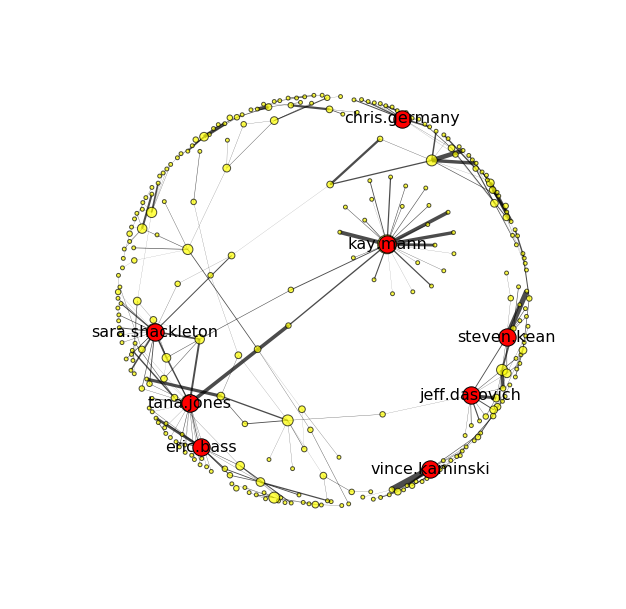

In [214]:
#param tuning: 1 node size can be very small, iterations can range 20-500,
# colors, 
g=nx.from_pandas_dataframe(gm_count_bt5,'From','To','Count')
weights = nx.get_edge_attributes(g,'Count')
plt.figure(figsize=(8,8)) 
node_position = nx.spring_layout(g,iterations=50)
nx.draw(g,pos= node_position,
        node_color='yellow', 
        with_labels= 0,
        nodelist = [k for k in nx.degree(g).keys()],
        node_size = [v*15 for v in nx.degree(g).values()],
        
        alpha=0.7,edge_color='black',
        width=weights_scaled*50+0.1)
labels = {}
nx.draw_networkx_nodes(g, pos=node_position, nodelist=selected_dict,node_color='red')
nx.draw_networkx_labels(g, pos=node_position, 
                        labels=selected_dict,
                        font_color = 'black',
                        font_size=16)
plt.show()


In [136]:
# network example for testing use -- ignore
tst =pd.DataFrame({'From':[1,2],'To':[2,1],'Count':[2,32]})
tst

,Count,From,To
0,2,1,2
1,32,2,1


In [135]:
nx.get_edge_attributes(H,'Count')

{(1, 2): 32, (2, 1): 32}

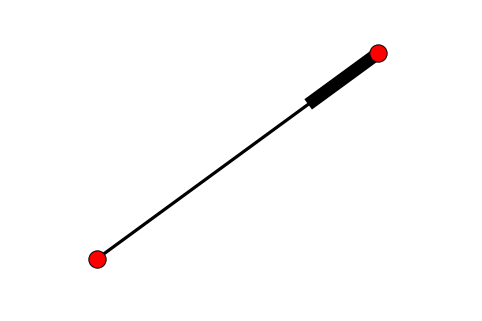

In [138]:

G = nx.from_pandas_dataframe(tst,'From','To','Count')
H = G.to_directed()
nx.draw(H,width=[0.2,3.2])